In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm
from sklearn.datasets import load_diabetes

In [3]:
diabetes=load_diabetes()

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [57]:
diabetes_df=DataFrame(diabetes.data)
diabetes_df.columns=diabetes.feature_names
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [58]:
diabetes_df['Diabetic_level']=diabetes.target #dataset is in target to predict
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetic_level
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [59]:
def Diabetes_check(x):
    if x>120:
        return 1
    else:
        return 0
    

In [60]:
diabetes_df['Diabetes']=diabetes_df['Diabetic_level'].apply(Diabetes_check)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetic_level,Diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0,1


In [61]:
x=diabetes_df.drop(['age','sex','s1','s2','s3','s4','s5','s6','Diabetic_level','Diabetes'],axis=1)
x.head()

,bmi,bp
0,0.061696,0.021872
1,-0.051474,-0.026328
2,0.044451,-0.005671
3,-0.011595,-0.036656
4,-0.036385,0.021872


In [62]:
y=diabetes_df.Diabetes

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(353, 2) (89, 2) (353,) (89,)


In [64]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)
test_predict=log_model.predict(x_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
df=pd.concat([DataFrame(np.ravel(y_test),columns=['Test Data']),DataFrame(test_predict,columns=['Test Pred'])],axis=1)
df.head()

,Test Data,Test Pred
0,1,1
1,0,1
2,1,1
3,0,1
4,1,1


In [66]:
log_model.score(x_test,y_test)#accuracy rate

0.651685393258427

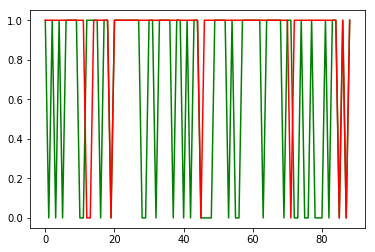

In [67]:
plt.plot(range(0,89),df['Test Data'],'g')
plt.plot(range(0,89),df['Test Pred'],'r')
plt.show()

In [68]:
#df

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kva

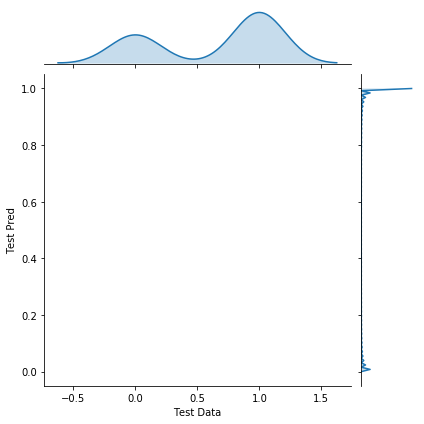

In [69]:
sns.jointplot(x='Test Data',y='Test Pred',data=df,kind='kde')

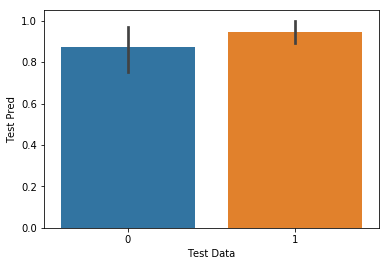

In [70]:
sns.barplot(x='Test Data',y='Test Pred',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


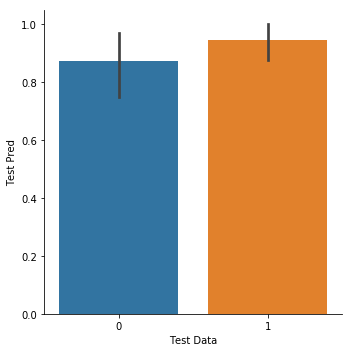

In [71]:
sns.factorplot(x='Test Data',y='Test Pred',data=df,kind='bar')

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
Knn=KNeighborsClassifier(n_neighbors=6)#no of neighbor=data in train
Knn.fit(x_train,y_train)
y_pred=Knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.6292134831460674


In [78]:
Knn=KNeighborsClassifier(n_neighbors=40)#no of neighbor=data in train
Knn.fit(x_train,y_train)
y_pred=Knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7752808988764045


In [87]:
k_range=range(1,50)
accuracy=[]
for k in k_range:
    Knn=KNeighborsClassifier(n_neighbors=k)
    Knn.fit(x_train,y_train)
    y_pred=Knn.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'k value for Knn')

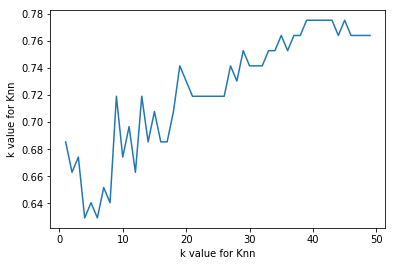

In [88]:
plt.plot(k_range,accuracy)
plt.xlabel('k value for Knn')
plt.ylabel('k value for Knn')